<a href="https://colab.research.google.com/github/axellevandeneynde/fml-assignment-week-4-5/blob/main/assignment_4_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Is the voice male or female? 

This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).



In [43]:
import seaborn as sns 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [26]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
df = pd.read_csv('/content/drive/My Drive/voice.csv' ,sep=',',)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


# Data Cleaning

# Exploratory data analysis

To begin, I'd like to see what correlation exists between the variables and gender. 

To do that I create dummy variables for the gender label.

In [28]:
gender_dummies = pd.get_dummies(df['label'])
df = pd.concat([df, gender_dummies], axis=1) 
df = df.drop(['male'], axis = 1)
df.rename(columns = {'female':'class'}, inplace = True)
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label,class
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male,0
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male,0
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male,0
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male,0
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female,1
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female,1
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female,1
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female,1


In [29]:
df['class'].value_counts()

1    1584
0    1584
Name: class, dtype: int64

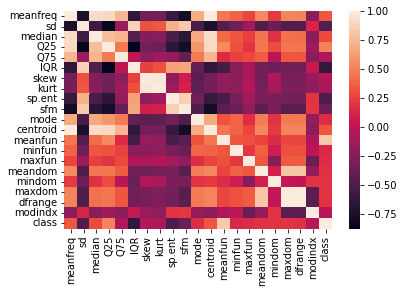

In [30]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns) #the last two arguments set the column names
plt.show()

In [31]:
corr = corr.sort_values(by=['class'])
corr['class']

IQR        -0.618916
sp.ent     -0.490552
sd         -0.479539
sfm        -0.357499
kurt       -0.087195
Q75        -0.066906
skew       -0.036627
modindx    -0.030801
minfun      0.136692
maxfun      0.166461
mode        0.171775
meandom     0.191067
dfrange     0.192213
mindom      0.194974
maxdom      0.195657
median      0.283919
meanfreq    0.337415
centroid    0.337415
Q25         0.511455
meanfun     0.833921
class       1.000000
Name: class, dtype: float64

Some (strong) correlations exist. 

Above 0.75 there is:
*   meanfun

Above 0.5 there is:
*   IQR
*   Q25

Above 0.25 there is:
*   meanfreq
*   centroid
*   median
*   sp.ent
*   sd
*   sfm

=> To make the assignment more comfortable I will be continuing with only these variables.







In [32]:
df = df.drop(['kurt', 'Q75', 'skew','modindx','minfun', 'maxfun', 'mode', 'meandom', 'dfrange','mindom','maxdom'], axis = 1)
df

,meanfreq,sd,median,Q25,IQR,sp.ent,sfm,centroid,meanfun,label,class
0,0.059781,0.064241,0.032027,0.015071,0.075122,0.893369,0.491918,0.059781,0.084279,male,0
1,0.066009,0.067310,0.040229,0.019414,0.073252,0.892193,0.513724,0.066009,0.107937,male,0
2,0.077316,0.083829,0.036718,0.008701,0.123207,0.846389,0.478905,0.077316,0.098706,male,0
3,0.151228,0.072111,0.158011,0.096582,0.111374,0.963322,0.727232,0.151228,0.088965,male,0
4,0.135120,0.079146,0.124656,0.078720,0.127325,0.971955,0.783568,0.135120,0.106398,male,0
...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.151859,0.962934,0.763182,0.131884,0.182790,female,1
3164,0.116221,0.089221,0.076758,0.042718,0.162193,0.960716,0.709570,0.116221,0.188980,female,1
3165,0.142056,0.095798,0.183731,0.033424,0.190936,0.946854,0.654196,0.142056,0.209918,female,1
3166,0.143659,0.090628,0.184976,0.043508,0.176435,0.950436,0.675470,0.143659,0.172375,female,1


# Predictive model

## Random Forest
The Algorithm creates multiple decision trees that each try to determine the class. The class that is most often resulted by the trees is considered the most likely class. 

In [36]:
X = df.loc[:,'meanfreq':'meanfun'] 
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1, n_estimators=100)
rf = rf.fit(X_train, y_train)

# Evaluation

In [39]:
rf.score(X_test,y_test)

0.9779179810725552

In [42]:
y_pred = rf.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_pred) #creates a "confusion matrix"
cm = pd.DataFrame(cm, index=['male (actual)', 'female (actual)'], columns = ['male (pred)', 'female (pred)']) #label and make df
cm

,male (pred),female (pred)
male (actual),480,14
female (actual),7,450


In [44]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       494
           1       0.97      0.98      0.98       457

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



The model predict the gender of the voice reasonably well. with only 1% of the detected 'male' voices being female and 3% of detected 'female' voices being male. On average the algorithm is wrong in 2% of the cases. 

# Conclusion

With random forest the gender of a voice can be determined in most cases with the variables in this data set. 